In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_path = r"C:\Users\HP\Downloads\pcparts\pc_parts"

In [5]:
# Data Normalisation
image_gen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range= 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2,
)

In [7]:
# Setting image Height width batch size

img_height = 250
img_width  = 250
batch_size = 40

In [9]:
# Image Generator

train_generator= image_gen.flow_from_directory( 
    data_path,
    target_size=(img_width,img_height),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    subset= 'training',
)

val_generator= image_gen.flow_from_directory( 
    data_path,
    target_size=(img_width,img_height),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    subset= 'validation')

Found 2629 images belonging to 14 classes.
Found 650 images belonging to 14 classes.


In [11]:
# Creating a Class for image Generator

classes = train_generator.class_indices

In [12]:
#this code, class_names will be a dictionary containing the numerical identifiers from the original classes

class_names = {value: key for key, value in classes.items()}
print("Class Names:", classes)

Class Names: {'cables': 0, 'case': 1, 'cpu': 2, 'gpu': 3, 'hdd': 4, 'headset': 5, 'keyboard': 6, 'microphone': 7, 'monitor': 8, 'motherboard': 9, 'mouse': 10, 'ram': 11, 'speakers': 12, 'webcam': 13}


In [13]:
classes

{'cables': 0,
 'case': 1,
 'cpu': 2,
 'gpu': 3,
 'hdd': 4,
 'headset': 5,
 'keyboard': 6,
 'microphone': 7,
 'monitor': 8,
 'motherboard': 9,
 'mouse': 10,
 'ram': 11,
 'speakers': 12,
 'webcam': 13}

In [15]:
# this model consists of several convolutional layers followed by max-pooling layers for feature extraction, 
#followed by fully connected layers for classification. 
# The final layer produces probabilities for each class using softmax activation.

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation= 'relu'),
    Dense(256, activation= 'relu'),
    Dense(14, activation= 'softmax')
    
])

In [16]:
# Model Copmpile

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# configures the model for training using the Adam optimizer, 
# categorical cross-entropy loss function, and accuracy as the evaluation metric.

history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


66/66 [==============================] - 100s 1s/step - loss: 2.6234 - accuracy: 0.0970 - val_loss: 2.5722 - val_accuracy: 0.1108
Epoch 2/20
66/66 [==============================] - 93s 1s/step - loss: 2.4884 - accuracy: 0.1491 - val_loss: 2.4266 - val_accuracy: 0.1662
Epoch 3/20
66/66 [==============================] - 92s 1s/step - loss: 2.3667 - accuracy: 0.1978 - val_loss: 2.3425 - val_accuracy: 0.2046
Epoch 4/20
66/66 [==============================] - 90s 1s/step - loss: 2.2843 - accuracy: 0.2294 - val_loss: 2.3129 - val_accuracy: 0.2523
Epoch 5/20
66/66 [==============================] - 95s 1s/step - loss: 2.2322 - accuracy: 0.2495 - val_loss: 2.2637 - val_accuracy: 0.2523
Epoch 6/20
66/66 [==============================] - 94s 1s/step - loss: 2.1498 - accuracy: 0.2655 - val_loss: 2.2404 - val_accuracy: 0.2523
Epoch 7/20
66/66 [==============================] - 94s 1s/step - loss: 2.1294 - accuracy: 0.2917 - val_loss: 2.1689 - val_accuracy: 0.3031
Epoch 8/20
66/66 

In [21]:
# these lines of code assess how well the trained model performs on unseen validation data.

eval_loss, eval_acc = model.evaluate_generator(val_generator)
print(f"Evaluation accuracy : {eval_acc}")
print(f"Evaluation loss : {eval_loss}")


Evaluation accuracy : 0.38769230246543884
Evaluation loss : 1.9286917448043823


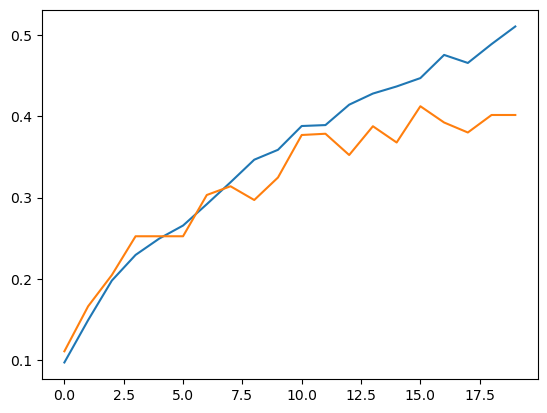

In [23]:
# This line will visualize the training and validation accuracy over epochs during the training of a neural network model.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

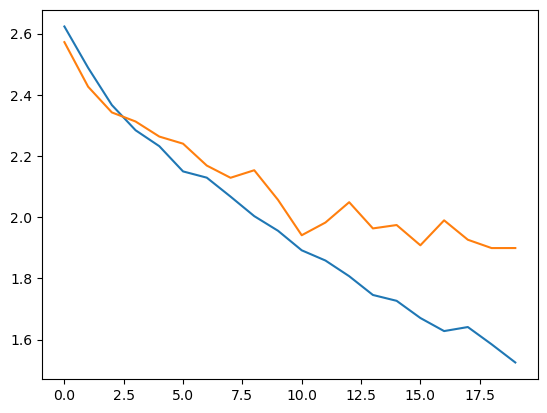

In [24]:
# This lines are plotting the training and validation loss over epochs during the training of a neural network model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [40]:
# The tensorflow.keras.preprocessing.image module provides utilities for working with images in the context of 
#deep learning tasks

In [41]:
from tensorflow.keras.preprocessing import image

In [42]:
# The variable img_path1 stores the file path of an image file named "83.jpg"
# The variable img_path2 stores the file path of an image file named "68.jpg"
# The variable img_path3 stores the file path of an image file named "90.jpg"

img_path1 = r"C:\Users\HP\Downloads\pcparts\pc_parts\case\83.jpg"
img_path2 = r"C:\Users\HP\Downloads\pcparts\pc_parts\motherboard\68.jpg"
img_path3 = r"C:\Users\HP\Downloads\pcparts\pc_parts\gpu\90.jpg"

In [43]:
# This lines  loads an image file from the specified path (img_path1) and resizes it to a target size specified by 
#(img_width, img_height)

img1 = image.load_img(img_path1, target_size=(img_width, img_height))
img2 = image.load_img(img_path2, target_size=(img_width, img_height))
img3 = image.load_img(img_path3, target_size=(img_width, img_height))

In [44]:
# The line img1_arr = image.img_to_array(img1) converts the image loaded into a PIL (Python Imaging Library) image object, 
# represented by img1, into a NumPy array representation.

img1_arr = image.img_to_array(img1)
img2_arr = image.img_to_array(img2)
img3_arr = image.img_to_array(img3)

In [45]:
#The line img1_arr = np.expand_dims(img1_arr, axis=0) expands the dimensions of the NumPy array img1_arr 
# along the specified axis.

img1_arr = np.expand_dims(img1_arr, axis=0)
img2_arr = np.expand_dims(img2_arr, axis=0)
img3_arr = np.expand_dims(img3_arr, axis=0)

In [46]:
# This line of code normalizes the pixel values of the image array img1_arr by dividing each pixel value by 255.0

img1_arr = img1_arr / 255.0
img2_arr = img2_arr / 255.0
img3_arr = img3_arr / 255.0

In [47]:
# This lines of code uses the trained model to make predictions on the input image represented by the array img_arr

pred1 = model.predict(img1_arr)
pred2 = model.predict(img2_arr)
pred3 = model.predict(img3_arr)

1/1 [==============================] - 0s 26ms/step


In [48]:
# This line of code computes the index of the class with the highest predicted probability from the predictions made by the 
# model (pred1). 

pred_class1 = np.argmax(pred1)
pred_class2 = np.argmax(pred2)
pred_class3 = np.argmax(pred3)

In [49]:
# This line of code prints the class label corresponding to the predicted class index pred_class. 

print(class_names[pred_class1]) 

case


In [50]:
print(class_names[pred_class2])

motherboard


In [51]:
print(class_names[pred_class3])

gpu


Text(0.5, 1.0, 'case')

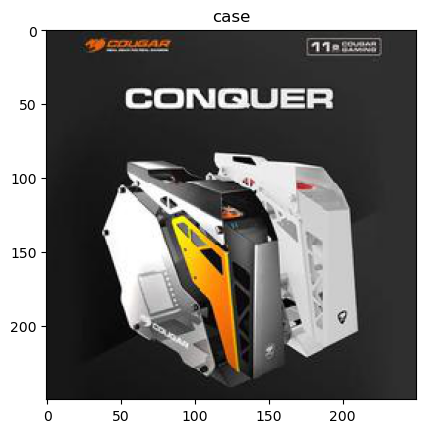

In [52]:
# This code snippet uses Matplotlib to display the input image (img1) along with its predicted class label as the 
# title of the plot. 

plt.imshow(img1)
plt.title(class_names[pred_class1])

Text(0.5, 1.0, 'motherboard')

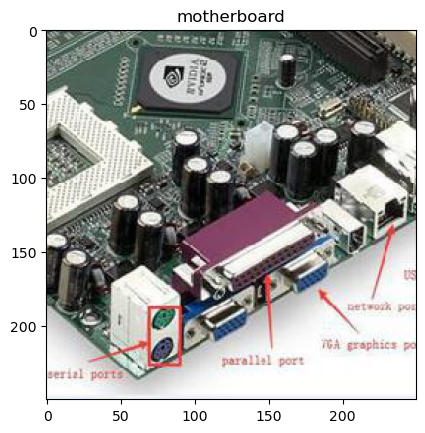

In [53]:
plt.imshow(img2)
plt.title(class_names[pred_class2])

Text(0.5, 1.0, 'gpu')

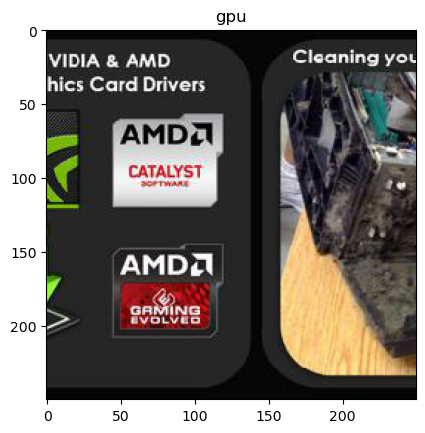

In [54]:
plt.imshow(img3)
plt.title(class_names[pred_class3])